In [103]:
folder = 'figures/007_dig_into_correlations'
! mkdir $folder

In [104]:
from __future__ import print_function

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2


import flotilla
study = flotilla.embark('singlecell_pnm_figure6_splicing_correlation_permuted', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-11-07 11:14:27	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure6_splicing_correlation_permuted/datapackage.json
2016-11-07 11:14:27	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-11-07 11:16:01 	Initializing Study
2016-11-07 11:16:01 	Initializing Predictor configuration manager for Study
2016-11-07 11:16:01	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-11-07 11:16:01	Added ExtraTreesClassifier to default predictors
2016-11-07 11:16:01	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-11-07 11:16:01	Added ExtraTreesRegressor to default predictors
2016-11-07 11:16:01	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemb

Error loading species hg19 data: HTTP Error 404: Not Found

In [105]:
means = study.supplemental.splicing_expression_corr_with_permuted.groupby(['Splicing Gene', 'dataset'])['Pearson R'].mean()
stds = study.supplemental.splicing_expression_corr_with_permuted.groupby(['Splicing Gene', 'dataset'])['Pearson R'].std()


In [ ]:
multiplier = 3

In [ ]:
lower_bound = means - multiplier*stds
lower_bound

In [ ]:
upper_bound = means + multiplier*stds
upper_bound

In [ ]:
splicing_genes = 'PKM', 'SMARCE1', 'SNAP25'

In [3]:
study.supplemental.splicing_expression_corr.head()

,Splicing Gene,level_1,Pearson R,dataset
0,PKM,ENSG00000000003,0.050616,Actual
1,PKM,ENSG00000000419,-0.121469,Actual
2,PKM,ENSG00000000457,0.057363,Actual
3,PKM,ENSG00000000460,0.047255,Actual
4,PKM,ENSG00000001036,-0.320053,Actual


In [4]:
df = study.supplemental.splicing_expression_corr
rows = (df['Splicing Gene'] == "PKM") & (df['dataset'] == 'Actual')
pkm = df.loc[rows]
print(pkm.shape)
pkm.head()

(17458, 4)


,Splicing Gene,level_1,Pearson R,dataset
0,PKM,ENSG00000000003,0.050616,Actual
1,PKM,ENSG00000000419,-0.121469,Actual
2,PKM,ENSG00000000457,0.057363,Actual
3,PKM,ENSG00000000460,0.047255,Actual
4,PKM,ENSG00000001036,-0.320053,Actual


From permutation analysis

In [5]:
lower_bound = -0.474251
upper_bound = 0.474338

In [6]:
rows = (pkm['Pearson R'] < lower_bound) | (pkm['Pearson R'] > upper_bound)
pkm_filtered = pkm.loc[rows]
print(pkm_filtered.shape)
pkm_filtered.head()

(360, 4)


,Splicing Gene,level_1,Pearson R,dataset
7,PKM,ENSG00000001460,-0.481463,Actual
38,PKM,ENSG00000004399,-0.528088,Actual
100,PKM,ENSG00000006327,-0.520701,Actual
111,PKM,ENSG00000006625,-0.527317,Actual
164,PKM,ENSG00000008394,-0.524712,Actual


In [7]:
pkm_filtered = pkm_filtered.rename(columns={"level_1": 'Expression Gene'})
print(pkm_filtered.shape)
pkm_filtered.head()

(360, 4)


,Splicing Gene,Expression Gene,Pearson R,dataset
7,PKM,ENSG00000001460,-0.481463,Actual
38,PKM,ENSG00000004399,-0.528088,Actual
100,PKM,ENSG00000006327,-0.520701,Actual
111,PKM,ENSG00000006625,-0.527317,Actual
164,PKM,ENSG00000008394,-0.524712,Actual


In [8]:
pkm_filtered_symbols = pkm_filtered.join(study.expression.feature_data['gene_name'], on='Expression Gene')
print(pkm_filtered_symbols.shape)
pkm_filtered_symbols.head()

(360, 5)


,Splicing Gene,Expression Gene,Pearson R,dataset,gene_name
7,PKM,ENSG00000001460,-0.481463,Actual,STPG1
38,PKM,ENSG00000004399,-0.528088,Actual,PLXND1
100,PKM,ENSG00000006327,-0.520701,Actual,TNFRSF12A
111,PKM,ENSG00000006625,-0.527317,Actual,GGCT
164,PKM,ENSG00000008394,-0.524712,Actual,MGST1


In [9]:
def direction(x):
    if x > 0:
        return "(+)"
    else:
        return '(-)'

pkm_filtered_symbols['Correlation direction'] = pkm_filtered_symbols['Pearson R'].map(direction)
pkm_filtered_symbols.head()

,Splicing Gene,Expression Gene,Pearson R,dataset,gene_name,Correlation direction
7,PKM,ENSG00000001460,-0.481463,Actual,STPG1,(-)
38,PKM,ENSG00000004399,-0.528088,Actual,PLXND1,(-)
100,PKM,ENSG00000006327,-0.520701,Actual,TNFRSF12A,(-)
111,PKM,ENSG00000006625,-0.527317,Actual,GGCT,(-)
164,PKM,ENSG00000008394,-0.524712,Actual,MGST1,(-)


In [10]:
pkm_filtered_symbols.groupby('Correlation direction').size()

Correlation direction
(+)    132
(-)    228
dtype: int64

In [11]:
pkm_filtered_symbols.to_csv('{}/pkm_filtered_correlations.csv'.format(folder))

In [15]:
# rows = pkm_filtered_symbols['Correlation direction'] == '(+)'

# print(pkm_filtered_symbols.loc[rows, 'Expression Gene'].to_csv(None, index=False))

In [16]:
! grep mygene ../*/*.ipynb

In [17]:
import goatools
import mygene

In [58]:
# Initialize the "mygene.info" (http://mygene.info/) interface
mg = mygene.MyGeneInfo()

mygene_output = mg.querymany(background_genes, 
                             scopes='ensemblgene', 
                             fields=['go.BP', 'go.MF', 'go.CC'], 
                             species='human')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-17458...done.
Finished.
7 input query terms found dup hits:
	[(u'ENSG00000228106', 2), (u'ENSG00000183889', 6), (u'ENSG00000215126', 2), (u'ENSG00000229719', 2),
587 input query terms found no hit:
	[u'ENSG00000005955', u'ENSG00000006114', u'ENSG00000017373', u'ENSG00000017621', u'ENSG00000031544',
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [56]:
import collections
import mygene


GO_KEYS_FULL = 'go.BP', 'go.MF', 'go.CC'
GO_KEYS_SPLIT = [x.split('.')[1] for x in GO_KEYS_FULL]


def parse_mygene_output(mygene_output):
    """Convert mygene.querymany output to a gene id to go term mapping (dictionary)

    Parameters
    ----------
    mygene_output : dict or list
        Dictionary (returnall=True) or list (returnall=False) of
        output from mygene.querymany

    Output
    ------
    gene_name_to_go : dict
        Mapping of gene name to a set of GO ids
    """
    # if "returnall=True" was specified, need to get just the "out" key
    if isinstance(mygene_output, dict):
        mygene_output = mygene_output['out']

    gene_name_to_go = collections.defaultdict(set)

    for line in mygene_output:
        gene_name = line['query']
        try:
            go_output = line['go']
        except KeyError:
            continue
        for go_key in GO_KEYS_SPLIT:
            try:
                go_terms = go_output[go_key]
            except KeyError:
                continue
            if isinstance(go_terms, dict):
                go_ids = set([go_terms['id']])
            else:
                go_ids = set(x['id'] for x in go_terms)
        gene_name_to_go[gene_name] |= go_ids
    return gene_name_to_go


def gene_ids_to_go(gene_ids, species='human,mouse,rat',
                   scopes='entrezgene,ensemblgene,retired,symbol',
                   fields=GO_KEYS_FULL,
                   **kwargs):
    """Get associated GO terms for each gene ID

    gene_ids : iterable of ids
        List of gene ids that you want to map
    species : str
        Comma-separated species to limit search. Default is "human,mouse,rat"
    scopes : str
        Comma-separated type of gene ids that you are giving.
        Default is "entrezgene,ensemblgene,retired,symbol"
    fields : iterable
        GO terms to use. Default is ['go.BP', 'go.MF', 'go.CC']

    Returns
    -------
    gene_to_go : dict
        Mapping of each provided gene id to a set object of GO terms
    """

    mg = mygene.MyGeneInfo()

    mygene_output = mg.querymany(gene_ids, fields=fields, scopes=scopes,
                                 species=species, **kwargs)

    gene_name_to_go = parse_mygene_output(mygene_output)
    return gene_name_to_go


In [ ]:
from goatools.base import download_go_basic_obo

def make_go_enricher(background_genes, species='human,mouse,rat',
                   scopes='entrezgene,ensemblgene,retired,symbol',
                   fields=GO_KEYS_FULL)
    obo_fname = download_go_basic_obo()

    obo_dag = goatools.obo_parser.GODag(obo_file=obo_fname)

    gene_to_go = gene_ids_to_go(background_genes, species, scopes, fields)
    go_enricher = goatools.GOEnrichmentStudy(background_genes, 
                                         gene_to_go, obo_dag)
    return go_enricher

In [57]:
background_genes = df['level_1'].unique()
len(background_genes)

17458

In [61]:
gene_name_to_go = parse_mygene_output(mygene_output)
len(gene_name_to_go)

12124

In [62]:
gene_name_to_go.keys()[:10]

[u'ENSG00000180008',
 u'ENSG00000167693',
 u'ENSG00000064703',
 u'ENSG00000230873',
 u'ENSG00000189292',
 u'ENSG00000110514',
 u'ENSG00000247077',
 u'ENSG00000086015',
 u'ENSG00000168032',
 u'ENSG00000142686']

In [64]:
mg.querymany(gene_ids, species='human,mouse,rat',
                   scopes='entrezgene,ensemblgene,retired,symbol',
                   fields=GO_KEYS_FULL,)

querying 1-10...done.
Finished.


[{u'_id': u'122809',
  u'_score': 21.914225,
  u'go': {u'BP': [{u'evidence': u'IDA',
     u'id': u'GO:0007175',
     u'pubmed': 15590694,
     u'term': u'negative regulation of epidermal growth factor-activated receptor activity'},
    {u'evidence': u'IEA',
     u'id': u'GO:0016567',
     u'term': u'protein ubiquitination'},
    {u'evidence': u'IBA',
     u'id': u'GO:0019221',
     u'term': u'cytokine-mediated signaling pathway'},
    {u'evidence': u'IEA',
     u'id': u'GO:0032436',
     u'term': u'positive regulation of proteasomal ubiquitin-dependent protein catabolic process'},
    {u'evidence': u'IEA',
     u'id': u'GO:0035556',
     u'term': u'intracellular signal transduction'},
    {u'evidence': u'IEA',
     u'id': u'GO:0040008',
     u'term': u'regulation of growth'},
    {u'evidence': u'IBA',
     u'id': u'GO:0046426',
     u'term': u'negative regulation of JAK-STAT cascade'}],
   u'CC': {u'evidence': u'IBA', u'id': u'GO:0005737', u'term': u'cytoplasm'},
   u'MF': {u'evidence'

In [63]:
gene_ids = [u'ENSG00000180008',
 u'ENSG00000167693',
 u'ENSG00000064703',
 u'ENSG00000230873',
 u'ENSG00000189292',
 u'ENSG00000110514',
 u'ENSG00000247077',
 u'ENSG00000086015',
 u'ENSG00000168032',
 u'ENSG00000142686']

gene_ids_to_go(gene_ids)

querying 1-10...done.
Finished.


defaultdict(set,
            {u'ENSG00000064703': {u'GO:0005634',
              u'GO:0005654',
              u'GO:0005737',
              u'GO:0005829',
              u'GO:0005856',
              u'GO:0016020',
              u'GO:0032797',
              u'GO:0034719',
              u'GO:0090571',
              u'GO:0097504'},
             u'ENSG00000086015': {u'GO:0005737', u'GO:0005886', u'GO:0015630'},
             u'ENSG00000110514': {u'GO:0005737',
              u'GO:0005829',
              u'GO:0005886',
              u'GO:0016021'},
             u'ENSG00000142686': {u'GO:0005515'},
             u'ENSG00000167693': {u'GO:0005634', u'GO:0005737', u'GO:0005829'},
             u'ENSG00000168032': {u'GO:0005886', u'GO:0016021'},
             u'ENSG00000180008': {u'GO:0005737'},
             u'ENSG00000189292': {u'GO:0005576'},
             u'ENSG00000230873': {u'GO:0031110'},
             u'ENSG00000247077': {u'GO:0005739',
              u'GO:0005741',
              u'GO:0016021'}})

In [65]:
asdf = {u'ENSG00000064703': {u'GO:0005634',
              u'GO:0005654',
              u'GO:0005737',
              u'GO:0005829',
              u'GO:0005856',
              u'GO:0016020',
              u'GO:0032797',
              u'GO:0034719',
              u'GO:0090571',
              u'GO:0097504'},
             u'ENSG00000086015': {u'GO:0005737', u'GO:0005886', u'GO:0015630'},
             u'ENSG00000110514': {u'GO:0005737',
              u'GO:0005829',
              u'GO:0005886',
              u'GO:0016021'},
             u'ENSG00000142686': {u'GO:0005515'},
             u'ENSG00000167693': {u'GO:0005634', u'GO:0005737', u'GO:0005829'},
             u'ENSG00000168032': {u'GO:0005886', u'GO:0016021'},
             u'ENSG00000180008': {u'GO:0005737'},
             u'ENSG00000189292': {u'GO:0005576'},
             u'ENSG00000230873': {u'GO:0031110'},
             u'ENSG00000247077': {u'GO:0005739',
              u'GO:0005741',
              u'GO:0016021'}}

In [ ]:
collections.defaultdict()

In [52]:
line = mygene_output[0]
line

{u'_id': u'7105',
 u'_score': 22.94159,
 u'go': {u'BP': [{u'evidence': u'IBA',
    u'id': u'GO:0007166',
    u'term': u'cell surface receptor signaling pathway'},
   {u'evidence': u'IMP',
    u'id': u'GO:0039532',
    u'pubmed': 22908223,
    u'term': u'negative regulation of viral-induced cytoplasmic pattern recognition receptor signaling pathway'},
   {u'evidence': u'IMP',
    u'id': u'GO:0043123',
    u'pubmed': 12761501,
    u'term': u'positive regulation of I-kappaB kinase/NF-kappaB signaling'},
   {u'evidence': u'IDA',
    u'id': u'GO:1901223',
    u'pubmed': 22908223,
    u'term': u'negative regulation of NIK/NF-kappaB signaling'}],
  u'CC': [{u'evidence': u'IBA',
    u'id': u'GO:0005887',
    u'term': u'integral component of plasma membrane'},
   {u'evidence': u'IDA',
    u'id': u'GO:0070062',
    u'pubmed': [19056867, 19199708, 23533145],
    u'term': u'extracellular exosome'}],
  u'MF': [{u'evidence': u'IMP',
    u'id': u'GO:0004871',
    u'pubmed': 12761501,
    u'term': u's

In [53]:
line['go']

{u'BP': [{u'evidence': u'IBA',
   u'id': u'GO:0007166',
   u'term': u'cell surface receptor signaling pathway'},
  {u'evidence': u'IMP',
   u'id': u'GO:0039532',
   u'pubmed': 22908223,
   u'term': u'negative regulation of viral-induced cytoplasmic pattern recognition receptor signaling pathway'},
  {u'evidence': u'IMP',
   u'id': u'GO:0043123',
   u'pubmed': 12761501,
   u'term': u'positive regulation of I-kappaB kinase/NF-kappaB signaling'},
  {u'evidence': u'IDA',
   u'id': u'GO:1901223',
   u'pubmed': 22908223,
   u'term': u'negative regulation of NIK/NF-kappaB signaling'}],
 u'CC': [{u'evidence': u'IBA',
   u'id': u'GO:0005887',
   u'term': u'integral component of plasma membrane'},
  {u'evidence': u'IDA',
   u'id': u'GO:0070062',
   u'pubmed': [19056867, 19199708, 23533145],
   u'term': u'extracellular exosome'}],
 u'MF': [{u'evidence': u'IMP',
   u'id': u'GO:0004871',
   u'pubmed': 12761501,
   u'term': u'signal transducer activity'},
  {u'evidence': u'IPI',
   u'id': u'GO:00055

In [48]:
gene_name_to_go

defaultdict(set, {})

In [66]:
from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo()

# Show the filename
print(obo_fname)

obo_dag = goatools.obo_parser.GODag(obo_file=obo_fname)


  EXISTS: go-basic.obo
go-basic.obo
go-basic.obo: format-version(1.2) data-version(releases/2016-11-07)

load obo file go-basic.obo
47689

 nodes imported


In [69]:
rows = pkm_filtered_symbols['Correlation direction'] == '(-)'

# print(pkm_filtered_symbols.loc[rows, 'Expression Gene'].to_csv(None, index=False))

go_enricher = goatools.GOEnrichmentStudy(background_genes, 
                                         gene_name_to_go, obo_dag)


12,124 out of 17,458 population items found in association


Propagating term counts to parents ..


In [90]:
def run_go(go_enricher, gene_ids, p_cutoff=0.001, correction='bonferroni'):
    
    results = go_enricher.run_study(gene_ids)
    go_enrichment = pd.DataFrame([r.__dict__ for r in results])

    p_column = 'p_' + correction

    rows = go_enrichment[p_column] < p_cutoff
    go_enrichment_filtered = go_enrichment.loc[rows]
    go_enrichment_filtered['-log10(q)'] = -np.log10(go_enrichment[p_column])
    
    return go_enrichment_filtered

In [91]:
go_enrichment = run_go(go_enricher, pkm_filtered_symbols.loc[rows, 'Expression Gene'])
print(go_enrichment.shape)
go_enrichment.head()

Calculating uncorrected p-values using Fisher's exact test
   205 out of    228 study items found in association
Running multitest correction: local bonferroni
Running multitest correction: local sidak
Running multitest correction: local holm
2,432 GO terms are associated with 205 of 228 study items in a population of 17,458
(28, 19)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,GO,NS,_methods,enrichment,goterm,name,p_bonferroni,p_holm,p_sidak,p_uncorrected,pop_count,pop_items,pop_n,ratio_in_pop,ratio_in_study,study_count,study_items,study_n,-log10(q)
450,GO:0005913,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005913\tlevel-03\tdepth-04\tcell-cell adhe...,cell-cell adherens junction,1.103045e-07,1.103045e-07,1.075245e-07,4.535549e-11,294,"{ENSG00000110841, ENSG00000120265, ENSG0000013...",17458,"(294, 17458)","(23, 228)",23,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",228,6.957407
451,GO:0005912,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005912\tlevel-03\tdepth-03\tadherens junct...,adherens junction,1.316019e-07,1.315478e-07,1.282851e-07,5.411264e-11,597,"{ENSG00000137312, ENSG00000167699, ENSG0000013...",17458,"(597, 17458)","(37, 228)",37,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",228,6.880738
452,GO:0005911,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005911\tlevel-02\tdepth-02\tcell-cell junc...,cell-cell junction,1.362597e-07,1.361477e-07,1.328255e-07,5.602785e-11,490,"{ENSG00000137312, ENSG00000167699, ENSG0000013...",17458,"(490, 17458)","(30, 228)",30,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",228,6.865633
453,GO:0070161,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0070161\tlevel-02\tdepth-02\tanchoring junc...,anchoring junction,1.993777e-07,1.991317e-07,1.943527e-07,8.198095e-11,607,"{ENSG00000137312, ENSG00000167699, ENSG0000013...",17458,"(607, 17458)","(39, 228)",39,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",228,6.700323
454,GO:0030054,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0030054\tlevel-01\tdepth-01\tcell junction ...,cell junction,3.046528e-07,3.041517e-07,2.969745e-07,1.252684e-10,1028,"{ENSG00000080815, ENSG00000137312, ENSG0000016...",17458,"(1028, 17458)","(44, 228)",44,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",228,6.516195


In [92]:
go_enrichment_top = go_enrichment.iloc[:10]
print(go_enrichment_top.shape)
go_enrichment_top.head()

(10, 19)


,GO,NS,_methods,enrichment,goterm,name,p_bonferroni,p_holm,p_sidak,p_uncorrected,pop_count,pop_items,pop_n,ratio_in_pop,ratio_in_study,study_count,study_items,study_n,-log10(q)
450,GO:0005913,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005913\tlevel-03\tdepth-04\tcell-cell adhe...,cell-cell adherens junction,1.103045e-07,1.103045e-07,1.075245e-07,4.535549e-11,294,"{ENSG00000110841, ENSG00000120265, ENSG0000013...",17458,"(294, 17458)","(23, 228)",23,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",228,6.957407
451,GO:0005912,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005912\tlevel-03\tdepth-03\tadherens junct...,adherens junction,1.316019e-07,1.315478e-07,1.282851e-07,5.411264e-11,597,"{ENSG00000137312, ENSG00000167699, ENSG0000013...",17458,"(597, 17458)","(37, 228)",37,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",228,6.880738
452,GO:0005911,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005911\tlevel-02\tdepth-02\tcell-cell junc...,cell-cell junction,1.362597e-07,1.361477e-07,1.328255e-07,5.602785e-11,490,"{ENSG00000137312, ENSG00000167699, ENSG0000013...",17458,"(490, 17458)","(30, 228)",30,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",228,6.865633
453,GO:0070161,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0070161\tlevel-02\tdepth-02\tanchoring junc...,anchoring junction,1.993777e-07,1.991317e-07,1.943527e-07,8.198095e-11,607,"{ENSG00000137312, ENSG00000167699, ENSG0000013...",17458,"(607, 17458)","(39, 228)",39,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",228,6.700323
454,GO:0030054,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0030054\tlevel-01\tdepth-01\tcell junction ...,cell junction,3.046528e-07,3.041517e-07,2.969745e-07,1.252684e-10,1028,"{ENSG00000080815, ENSG00000137312, ENSG0000016...",17458,"(1028, 17458)","(44, 228)",44,"{ENSG00000011426, ENSG00000074181, ENSG0000015...",228,6.516195


In [96]:
go_enrichment_top = go_enrichment_top.iloc[::-1]
go_enrichment_top.head()

,GO,NS,_methods,enrichment,goterm,name,p_bonferroni,p_holm,p_sidak,p_uncorrected,pop_count,pop_items,pop_n,ratio_in_pop,ratio_in_study,study_count,study_items,study_n,-log10(q)
459,GO:0044422,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0044422\tlevel-01\tdepth-01\torganelle part...,organelle part,4.973248e-07,4.954843e-07,4.847905e-07,2.044921e-10,6557,"{ENSG00000064703, ENSG00000247077, ENSG0000016...",17458,"(6557, 17458)","(141, 228)",141,"{ENSG00000051596, ENSG00000182871, ENSG0000019...",228,6.303360
458,GO:0044424,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0044424\tlevel-02\tdepth-02\tintracellular ...,intracellular part,4.829476e-07,4.813590e-07,4.707757e-07,1.985804e-10,10036,"{ENSG00000180008, ENSG00000167693, ENSG0000006...",17458,"(10036, 17458)","(183, 228)",183,"{ENSG00000051596, ENSG00000182871, ENSG0000019...",228,6.316100
457,GO:0044464,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0044464\tlevel-01\tdepth-01\tcell part [cel...,cell part,4.820975e-07,4.807099e-07,4.699470e-07,1.982309e-10,10938,"{ENSG00000180008, ENSG00000167693, ENSG0000006...",17458,"(10938, 17458)","(194, 228)",194,"{ENSG00000051596, ENSG00000163249, ENSG0000018...",228,6.316865
456,GO:0044446,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0044446\tlevel-02\tdepth-03\tintracellular ...,intracellular organelle part,4.269935e-07,4.259400e-07,4.162318e-07,1.755730e-10,6445,"{ENSG00000064703, ENSG00000247077, ENSG0000016...",17458,"(6445, 17458)","(138, 228)",138,"{ENSG00000051596, ENSG00000182871, ENSG0000019...",228,6.369579
455,GO:0005575,CC,"[(local, bonferroni, bonferroni), (local, sida...",e,GO:0005575\tlevel-00\tdepth-00\tcellular_compo...,cellular_component,3.367583e-07,3.360660e-07,3.282709e-07,1.384697e-10,11716,"{ENSG00000180008, ENSG00000167693, ENSG0000006...",17458,"(11716, 17458)","(202, 228)",202,"{ENSG00000051596, ENSG00000163249, ENSG0000018...",228,6.472682


In [98]:
sns.set(context='paper', style='whitegrid')

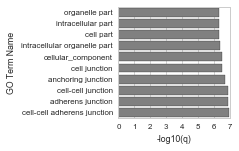

In [102]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.barplot(x='-log10(q)', y='name', data=go_enrichment_top, color='grey')
ax.set(xlabel='-log10(q)', ylabel='GO Term Name')
